## Employee Attrition Prediction Using Machine Learning Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Exploratory Data Analysis (EDA)

This section loads the Employee Attrition Dataset which is made up of 1470 records and 35 features. In this section, duplicated and mising records were first checked, columns were all unified to lowercase for easy use. Data types for all the features were identifed and used this to divide them into numerical and categorical variables. AIt also includes a summary of statistics of the dataset for the different features which included the count, mean, min, max, quartile ranges. 
This section also includes some visualizations of the target variable and some independent variables. Investigations of the exporations of the target variable include the following; about 16% of employees are most likely to depart from work either voluntarily or involuntarily, the attrition rate is given by 16.1%.

In [2]:
# Loading the dataset
df = pd.read_csv('employee_attrition_dataset.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Checking for Duplicates
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    1470
dtype: int64
1470


In [4]:
len(df), df.shape

(1470, (1470, 35))

In [5]:
# Viewing all coulmns as rows
df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [6]:
columns = df.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Making columns uniform by changing all of them to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for columns in categorical_columns:
    df[columns] = df[columns].str.lower().str.replace(' ', '_')

In [8]:
column_datatype = (df.dtypes == object).values
column_datatype

array([False,  True,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [9]:
# Matching columns with their datatypes for easy extraction
list(zip(columns, column_datatype))

[('o', False),
 ('v', True),
 ('e', True),
 ('r', False),
 ('t', True),
 ('i', False),
 ('m', False),
 ('e', True)]

In [10]:
# Finding missing values
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [11]:
categorical = ['attrition', 'businesstravel', 'department', 'educationfield', 'gender', 
               'jobrole', 'maritalstatus', 'over18', 'overtime']

numerical = ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 
             'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 
             'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 
             'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 
             'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 
             'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']

In [12]:
# Confirming that # of numerical & # of categorical are give the same # of columns as df
df.shape, df[categorical].shape[1] + df[numerical].shape[1]

((1470, 35), 35)

In [13]:
df[categorical].shape[1] + df[numerical].shape[1]

35

#### Summary of statistics

In [14]:
df.describe().round(3)

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000,1470.000,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,...,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.0,1024.865,2.722,65.891,2.730,2.064,...,2.712,80.0,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.0,602.024,1.093,20.329,0.712,1.107,...,1.081,0.0,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.0,1.000,1.000,30.000,1.000,1.000,...,1.000,80.0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.0,491.250,2.000,48.000,2.000,1.000,...,2.000,80.0,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.0,1020.500,3.000,66.000,3.000,2.000,...,3.000,80.0,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.0,1555.750,4.000,83.750,3.000,3.000,...,4.000,80.0,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.0,2068.000,4.000,100.000,4.000,5.000,...,4.000,80.0,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


#### Visualizations

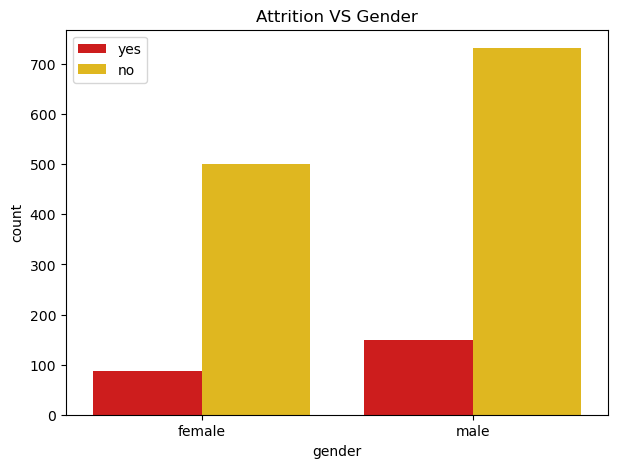

In [15]:
# Attrition with respect to the Gender
plt.figure(figsize=(7,5))
sns.countplot(x='gender',hue='attrition',data=df, palette='hot')
plt.title( 'Attrition VS Gender')
plt.legend(loc='best')
plt.show()

# This indicates that males are more likey to depart from their workplaces as compared to the women

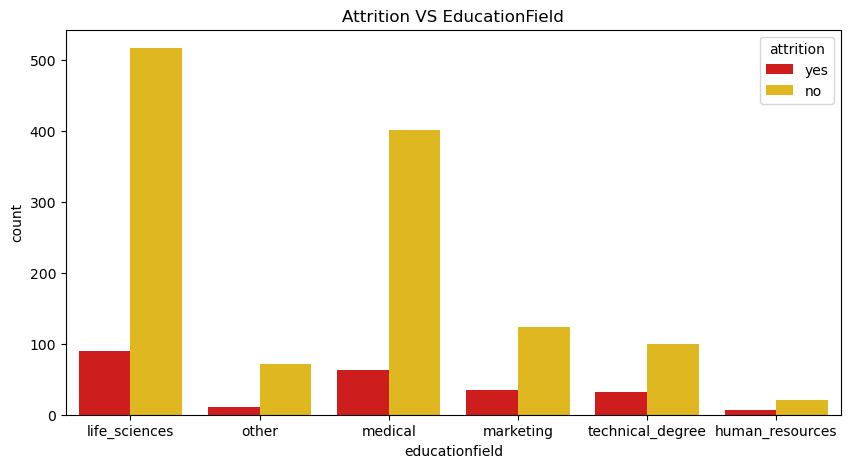

In [16]:
# Attrition with respect to the EducationField
plt.figure(figsize=(10,5))
sns.countplot(x='educationfield',hue='attrition',data=df, palette='hot')
plt.title( 'Attrition VS EducationField')
plt.show()

### Exploring the distribution of the target variable

In [17]:
# Converting attrition to numerical
df.attrition = (df.attrition == 'yes').astype(int)

In [18]:
df['attrition'].value_counts()

# This indicates that 237 employees left organizations either voluntarily or invouluntarily.

0    1233
1     237
Name: attrition, dtype: int64

In [19]:
# Getting the percentage of the count (Attrition Rate)
df.attrition.value_counts(normalize=True)

# This indicates that about 16% of employees are most likely to depart from work either voluntarily or involuntarily 

0    0.838776
1    0.161224
Name: attrition, dtype: float64

In [20]:
# Getting the attrition rate which is the same as percentage of attrition == yes
global_mean = df.attrition.mean()
round(global_mean, 3)

0.161

### Encoding categorical variables
The categorical features were encoded using the DictVectorizer from sklearn.feature_extraction

In [21]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
df[categorical].iloc[:10]

,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus,over18,overtime
0,1,travel_rarely,sales,life_sciences,female,sales_executive,single,y,yes
1,0,travel_frequently,research_&_development,life_sciences,male,research_scientist,married,y,no
2,1,travel_rarely,research_&_development,other,male,laboratory_technician,single,y,yes
3,0,travel_frequently,research_&_development,life_sciences,female,research_scientist,married,y,yes
4,0,travel_rarely,research_&_development,medical,male,laboratory_technician,married,y,no
5,0,travel_frequently,research_&_development,life_sciences,male,laboratory_technician,single,y,no
6,0,travel_rarely,research_&_development,medical,female,laboratory_technician,married,y,yes
7,0,travel_rarely,research_&_development,life_sciences,male,laboratory_technician,divorced,y,no
8,0,travel_frequently,research_&_development,life_sciences,male,manufacturing_director,single,y,no
9,0,travel_rarely,research_&_development,medical,male,healthcare_representative,married,y,no


In [23]:
to_dict = df[categorical + numerical].to_dict(orient='records')
to_dict[0]

{'attrition': 1,
 'businesstravel': 'travel_rarely',
 'department': 'sales',
 'educationfield': 'life_sciences',
 'gender': 'female',
 'jobrole': 'sales_executive',
 'maritalstatus': 'single',
 'over18': 'y',
 'overtime': 'yes',
 'age': 41,
 'dailyrate': 1102,
 'distancefromhome': 1,
 'education': 2,
 'employeecount': 1,
 'employeenumber': 1,
 'environmentsatisfaction': 2,
 'hourlyrate': 94,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobsatisfaction': 4,
 'monthlyincome': 5993,
 'monthlyrate': 19479,
 'numcompaniesworked': 8,
 'percentsalaryhike': 11,
 'performancerating': 3,
 'relationshipsatisfaction': 1,
 'standardhours': 80,
 'stockoptionlevel': 0,
 'totalworkingyears': 8,
 'trainingtimeslastyear': 0,
 'worklifebalance': 1,
 'yearsatcompany': 6,
 'yearsincurrentrole': 4,
 'yearssincelastpromotion': 0,
 'yearswithcurrmanager': 5}

In [24]:
dv = DictVectorizer(sparse=False)
data1 = dv.fit_transform(to_dict)
data1.shape

(1470, 56)

In [25]:
# Getting to see the entire columns inluding the encoded ones
# And they are indeed 56 in number
dv.get_feature_names_out()

array(['age', 'attrition', 'businesstravel=non-travel',
       'businesstravel=travel_frequently', 'businesstravel=travel_rarely',
       'dailyrate', 'department=human_resources',
       'department=research_&_development', 'department=sales',
       'distancefromhome', 'education', 'educationfield=human_resources',
       'educationfield=life_sciences', 'educationfield=marketing',
       'educationfield=medical', 'educationfield=other',
       'educationfield=technical_degree', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender=female',
       'gender=male', 'hourlyrate', 'jobinvolvement', 'joblevel',
       'jobrole=healthcare_representative', 'jobrole=human_resources',
       'jobrole=laboratory_technician', 'jobrole=manager',
       'jobrole=manufacturing_director', 'jobrole=research_director',
       'jobrole=research_scientist', 'jobrole=sales_executive',
       'jobrole=sales_representative', 'jobsatisfaction',
       'maritalstatus=divorced', 'marital

###  Feature Selection
Correlation is often used in machine learning to identify multicollinearity, which is when two or more predictor variables are highly correlated with each other. Multicollinearity can impact the accuracy of predictive models, thus the following features were removed since they were identified to be having a high multicollinearity (r >0.6):
* joblevel and totalworkingyears
* joblevel and monthlyincome
* age and totalworkingyears
* monthlyincome and totalworkingyears
* percentsalaryhike and performancerating
* totalworkingyears and yearsatcompany
* yearsatcompany and yearswithcurrmanager
* yearsincurrentrole and yearsatcompany
* yearsincurrentrole and yearswithcurrmanager
* yearsatcompany and yearssincelastpromotion

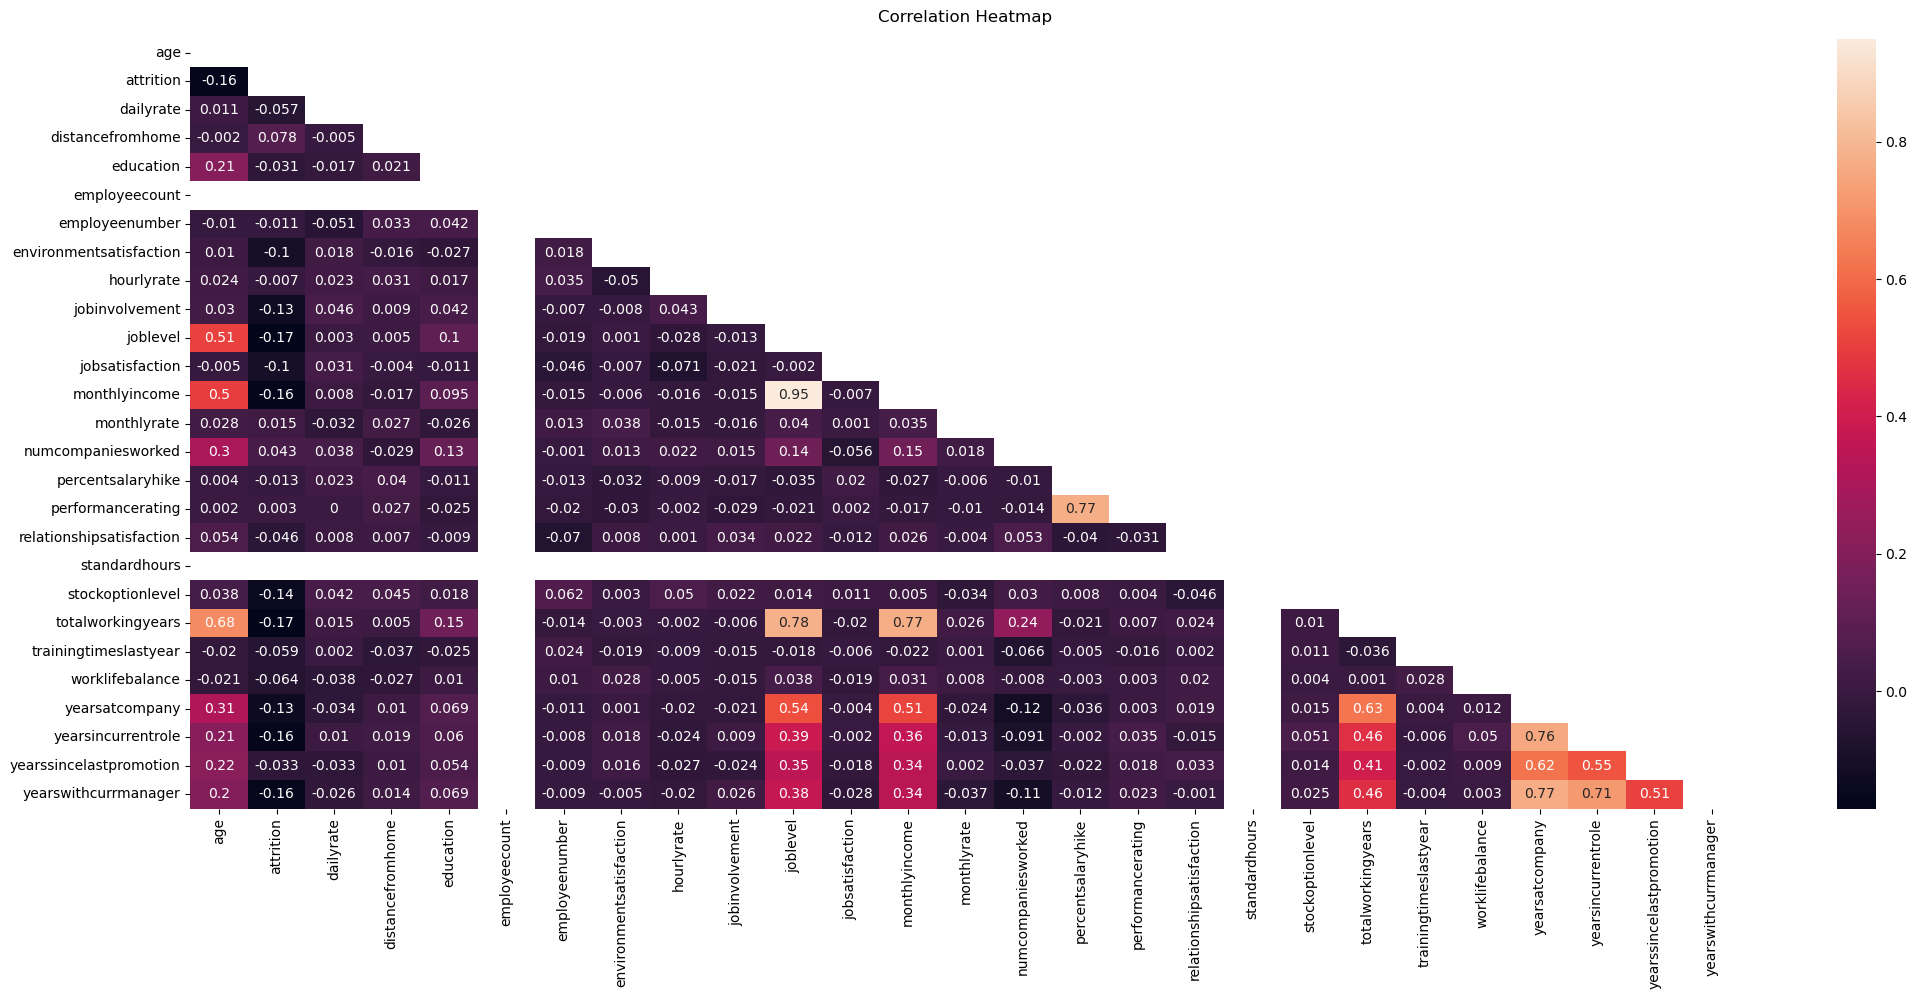

In [26]:
plt.figure(figsize=(25, 10))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr().round(3),mask=mask, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

plt.show()

### Model Building
The data was split into train and test dataset using the Scikit-learn library.The training dataset was futher divided into training and validation datasets so as to validate the model. The training, testing and validation comprised of 882, 294, 294 records

* ...to do

In [27]:
from sklearn.model_selection import train_test_split

In [78]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [79]:
len(df_full_train), len(df_test), len(df_train), len(df_val)

(1176, 294, 882, 294)

In [80]:
# droppig default indices
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [81]:
# The target variable vector
y_train = (df_train.attrition == 'default').astype('int').values
y_test = (df_test.attrition == 'default').astype('int').values
y_val = (df_val.attrition == 'default').astype('int').values

In [82]:
# Deleting out the target variable in the train and testing dataframe

del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

### Decision Tree Algorithm
The model is built using the DecisionTreeeClassifier. Firstly, the train and validation datasets whose length are 20% of the train_full dataset each were used to build the model. Secondly, the train_full and test datasets whose length are 80% and 20% respectively were used to build the same model.

#### 1. Using the train, and validation dataset first

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
# using the training dataset
train_dicts = df_train.to_dict(orient='records')

In [85]:
dv = DictVectorizer(sparse=False)
# Feature matrix for the training dataset
X_train = dv.fit_transform(train_dicts)

In [86]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
# using the val dataset
val_dicts = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
# Feature matrix for the validation dataset
X_val = dv.transform(val_dicts)

AttributeError: 'DictVectorizer' object has no attribute 'feature_names_'

#### a. Using the trained model to make predictions on the training and validation dataset (20% of the 80% training each)

In [104]:
# Making predictions using our model
y_pred = dt.predict_proba(X_train)

y_pred = dt.predict_proba(X_val)[:, 0]

#### 2. Using the train_full, and test dataset 

In [89]:
# # using the full training dataset without splitting it into validation and train datasets
# full_train_dicts = df_full_train.to_dict(orient='records')

# dv = DictVectorizer(sparse=False)
# # Feature matrix for the full training dataset
# X_full_train = dv.fit_transform(full_train_dicts)

In [90]:
# dt = DecisionTreeClassifier()
# dt.fit(X_full_train, y_train_full)

In [91]:
# # using the test dataset
# test_dicts = df_test.to_dict(orient='records')

# # Feature matrix for the validation dataset
# X_test = dv.transform(test_dicts)

#### b. Using the trained model to make predictions on the test and full train dataset (80% training, 20% test respectively)

In [92]:
# # Making predictions using our model
# y_pred = dt.predict_proba(X_full_train)

# y_pred = dt.predict_proba(X_test)

In [93]:
# from sklearn.metrics import roc_auc_score
# for d in [1, 2, 3, 4, 5, 6, 7, 8, 10, 21, None]:
#     dt = DecisionTreeClassifier(max_depth=d)
#     dt.fit(X_train, y_train)
    
#     y_pred = dt.predict_proba(X_val)
#     auc = roc_auc_score(y_val, y_pred)
#     print('%4s -> %.3f' % (d, auc))

### 3. Removing the highly correlated features from the dataframe

### Logistic Regression Algorithm

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
# model = LogisticRegression()
# model.fit(X_train, y_train)

In [96]:
# model = LogisticRegression()
# model.fit(X_full_train, y_train_full)

### Random Forest Algorithm

In [97]:
from sklearn.ensemble import RandomForestClassifier

#### 1. Using the train, and validation dataset first

In [98]:
# rf = RandomForestClassifier(n_estimators=10)
# rf.fit(X_train, y_train)
# y_pred = rf.predict_proba(X_val)

#### 2. Using the train_full, and test dataset 

In [99]:
# rf = RandomForestClassifier(n_estimators=10)
# rf.fit(X_full_train, y_train_full)
# y_pred = rf.predict_proba(X_test)

### Evaluation of the Model
The evaluation metrics used included precision, recall, F1-score, and ROC-AUC. Precision metrics identifies how many positive predications turned out to be correct calculated as TF/(TP+FP).

In [105]:
# Confusion Table
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [106]:
confusion_metrics = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_metrics

array([[  0, 294],
       [  0,   0]])